In [529]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing
from sklearn import cross_validation, metrics  
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import math
from sklearn.cross_validation import train_test_split

In [530]:
def plot_cumres(df):
    res_range = np.linspace(0.01, 2, 2000)
    res_list = []
    for i in res_range:
        res_list.append(df[df['Absolute Residuals']<i].shape[0]/df.shape[0])

    plt.figure(figsize=(15, 8))
    plt.xlabel("Absolute Residual")
    plt.ylabel("Cumulative Frequency")
    plt.title("Cumulative Frequency of Absolute Residuals")
    plt.scatter(x=list(res_range), y=res_list)
    plt.show()

    print(df[df['Absolute Residuals']<.35].shape[0]/df.shape[0])
    
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(11,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def get_margin(inputs):
    #convert string to boolean
    if(inputs[1]=='False'):
        inputs[1] = 0
    else:
        inputs[1] = 1 
    sale_type = 'Sale_Type_Final_' + inputs[2]
    channel = 'Channel_' + inputs[3]
    seasonal = 'Seasonal_' + inputs[4]
    pricing = 'Pricing_' + inputs[5]
    #fiscal = 'FiscalQuarter_' + str(inputs[6])
    #term = 'Term_' + str(inputs[7])
    
    all_stype = ['Sale_Type_Final_Renewal', 'Sale_Type_Final_Acquisition']
    all_channel = ['Channel_LC&I', 'Channel_Mid-Market']
    all_season = ['Seasonal_Both', 'Seasonal_Not Seasonal', 'Seasonal_Seasonal']
    all_pricing = ['Pricing_F1', 'Pricing_F2', 'Pricing_N1', 'Pricing_N2']
    #all_fiscal = ['FiscalQuarter_1', 'FiscalQuarter_3']
    #all_term = ['Term_12', 'Term_24', 'Term_36']

    """
    Create a dictionary that maps the categorical variables to either 0/1 (binary) if the
    inputted value matches it. For example, if "Seasonal" was "Not Seasonal" the dictionary
    would look like:
    {"Seasonal_Both": 0, "Seasonal_Not Seasonal": 1, "Seasonal_Seasonal": 0}
    """
    d_stype = {stype: 0 if stype!=sale_type else 1 for stype in all_stype}
    d_channel = {chan: 0 if chan!=channel else 1 for chan in all_channel}
    d_season = {seas: 0 if seas!=seasonal else 1 for seas in all_season}
    d_pricing = {plan: 0 if plan!=pricing else 1 for plan in all_pricing}
    #d_fiscal = {f:0 if f!=fiscal else 1 for f in all_fiscal}
    #d_term = {t:0 if t!=term else 1 for f in all_term}
    
    #Compile into one dictionary
    profile = {'Annual Consumption': inputs[0], 'Consulting': inputs[1]}
    profile.update(d_stype)
    profile.update(d_channel)
    profile.update(d_season)
    profile.update(d_pricing)
    #profile.update(d_fiscal)
    #profile.update(d_term)
    
    #Map dummy variables to actual values, perform standardization, and return prediction
    profile = {'f'+str(i): profile[j] for i, j in enumerate(dtrain.feature_names)}
    name = 'some company'
    x_dict = {name: profile}
    x_pred = pd.DataFrame.from_dict(x_dict, orient='index')
    x_pred = scaler.transform(x_pred)

    return clf.predict(x_pred)[0]

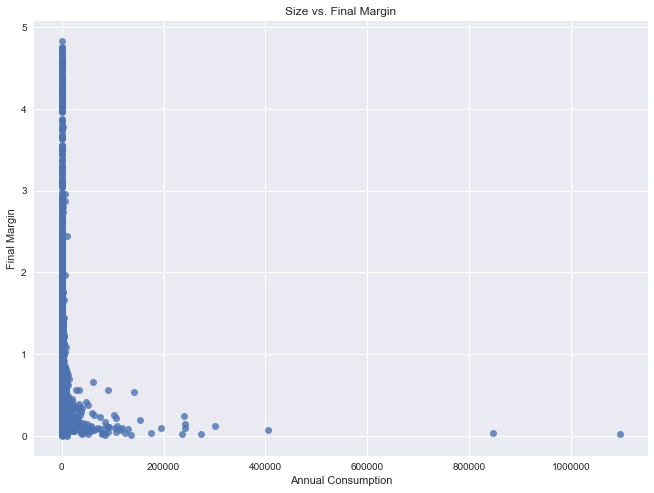

In [593]:
data = pd.read_csv('marginsfinal.csv', index_col=0)
mask = np.logical_and(data['Annual Consumption']>0, data['Final Margin']>0)
data = data[mask]
size_margins = data[['Final Margin', 'Annual Consumption']]
plt.figure(figsize=(11,8))
sns.set()
sns.regplot(size_margins['Annual Consumption'],
         size_margins['Final Margin'], fit_reg=False)
plt.title("Size vs. Final Margin")
plt.show()

In [594]:
df = data
df = df.drop(['DDDC', 'Rep Name', 'Total Meters', 'Record Type', 'Industry', 'Term', 'FiscalQuarter'], axis=1)
df = df.dropna(how='any')
df = df[~df.index.duplicated(keep='first')]

In [595]:
#df_final = pd.concat([df, df2], sort=True)
df_final = df
margins = df_final['Final Margin']

In [596]:
x_data = df_final
x_data = x_data.drop(['Final Margin'], axis=1)
col_encode = ['Sale_Type_Final', 'Channel', 'Seasonal', 'Pricing']
x_data_encode = pd.get_dummies(x_data, columns = col_encode)
x_data_encode

,Annual Consumption,Consulting,Sale_Type_Final_Acquisition,Sale_Type_Final_Renewal,Channel_LC&I,Channel_Mid-Market,Seasonal_Both,Seasonal_Not Seasonal,Seasonal_Seasonal,Pricing_F1,Pricing_F2,Pricing_N1,Pricing_N2
Id,,,,,,,,,,,,,
0066100000KXIBOAA5,858,0,1,0,1,0,0,1,0,0,1,0,0
0066100000HYQU6AAP,2404,0,1,0,0,1,0,1,0,1,0,0,0
0066100000FWj0oAAD,247,0,0,1,0,1,0,1,0,1,0,0,0
0066100000FXi3TAAT,506,0,0,1,0,1,0,1,0,1,0,0,0
0066100000FXi63AAD,711,0,0,1,0,1,0,1,0,1,0,0,0
0066100000FXkyEAAT,418,0,0,1,0,1,0,1,0,1,0,0,0
0066100000FXl1mAAD,1253,0,0,1,0,1,0,1,0,1,0,0,0
0066100000FXmOOAA1,1511,0,0,1,0,1,0,1,0,1,0,0,0
0066100000FXmSpAAL,326,0,0,1,0,1,0,1,0,1,0,0,0


In [597]:
dtrain = xgb.DMatrix(x_data_encode, label=margins)
print(dtrain.feature_names)
X_train, X_test, y_train, y_test = train_test_split(x_data_encode, margins, test_size=0.33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

['Annual Consumption', 'Consulting', 'Sale_Type_Final_Acquisition', 'Sale_Type_Final_Renewal', 'Channel_LC&I', 'Channel_Mid-Market', 'Seasonal_Both', 'Seasonal_Not Seasonal', 'Seasonal_Seasonal', 'Pricing_F1', 'Pricing_F2', 'Pricing_N1', 'Pricing_N2']


In [598]:
#best_params = {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 
#               'min_child_weight': 5, 'n_estimators': 500, 'reg_alpha': 0.01}
best_params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 
               'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0.01}
clf = xgb.XGBRegressor(**best_params)
clf.fit(X_train, y_train)
pred_train_val = clf.predict(X_train)
pred_val = clf.predict(X_test)

R^2 value is 0.6758623014945832
Mean Absolute Error is  0.36216678807523595
MSE is  0.28502844131872246


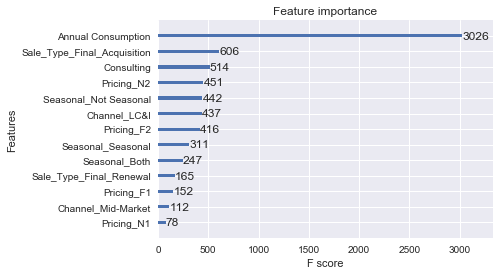

In [599]:
print("R^2 value is", metrics.r2_score(y_test, pred_val))
print("Mean Absolute Error is ", metrics.mean_absolute_error(y_test, pred_val))
print("MSE is ", metrics.mean_squared_error(y_test, pred_val))
mapper = {'f{0}'.format(i): v for i, v in enumerate(dtrain.feature_names)}
mapped = {mapper[k]: v for k, v in clf._Booster.get_score().items()}
xgb.plot_importance(mapped)
plt.show()

In [600]:
y_pred = {}
for val, name in enumerate(y_test.index):
    y_pred[name] = pred_val[val]

In [601]:
pred_series = pd.Series(y_pred)
final_res = pd.concat([pred_series, y_test], axis=1)
final_res.columns = ['Predicted', 'Actual']
final_res['Residuals'] = final_res['Actual'] - final_res['Predicted']
final_res['Absolute Residuals'] = np.abs(final_res['Actual'] - final_res['Predicted'])
final_res

,Predicted,Actual,Residuals,Absolute Residuals
Id,,,,
0066100000COZMzAAP,1.322874,0.7395,-0.583374,0.583374
0066100000N8s19AAB,0.736555,0.5240,-0.212555,0.212555
0066100000K1IlXAAV,0.384101,0.2298,-0.154301,0.154301
0066100000GBqVjAAL,0.373735,0.3568,-0.016935,0.016935
0066100000KUMHhAAP,1.313169,1.2856,-0.027569,0.027569
0066100000Ez8v1AAB,0.211969,0.3680,0.156031,0.156031
0066100000HW0pzAAD,1.691642,1.2849,-0.406742,0.406742
0066100000MmAy2AAF,0.252880,0.5584,0.305520,0.305520
0066100000ETSgmAAH,0.810467,1.5806,0.770133,0.770133


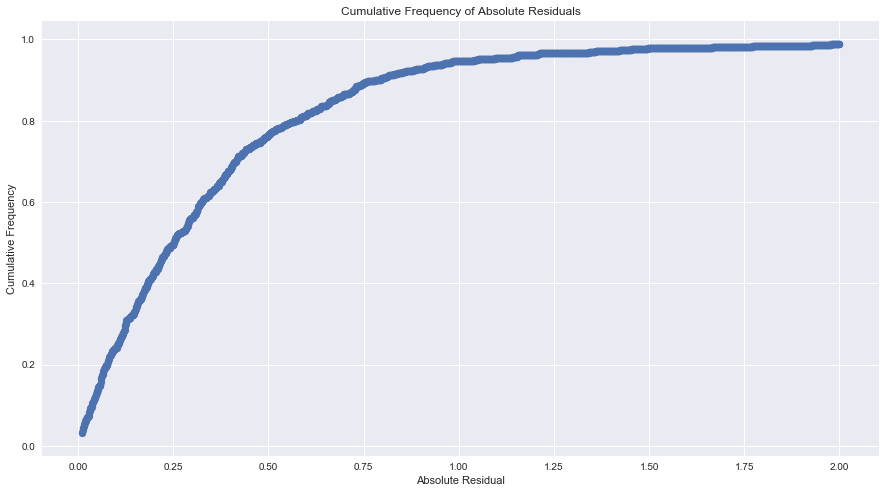

0.6248236953455572


In [602]:
plot_cumres(final_res)

Median residual is  -0.05987639551162721


C:\Users\GAS01589\AppData\Local\Continuum\miniconda2\envs\py3k\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


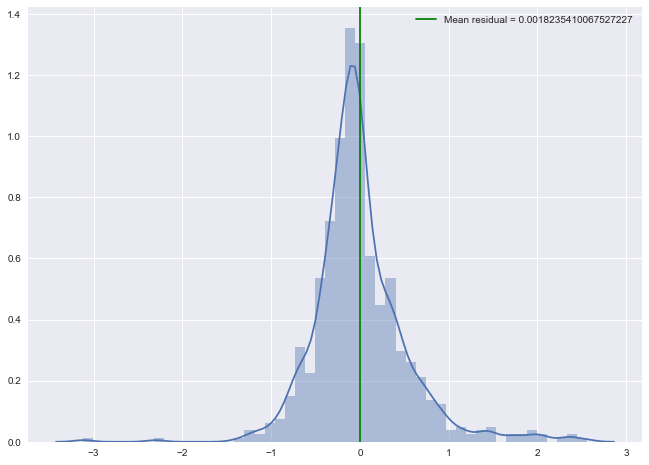

<Figure size 792x576 with 0 Axes>

In [603]:
plt.figure(figsize=(11,8))
sns.distplot(list(final_res['Residuals'].values))
mean = np.mean(final_res['Residuals'])
plt.axvline(mean, color='g', label='Mean residual = '+str(mean))
plt.legend()
plt.figure(figsize=(11,8))
print("Median residual is ", np.median(final_res['Residuals']))

<module 'matplotlib.pyplot' from 'C:\\Users\\GAS01589\\AppData\\Local\\Continuum\\miniconda2\\envs\\py3k\\lib\\site-packages\\matplotlib\\pyplot.py'>

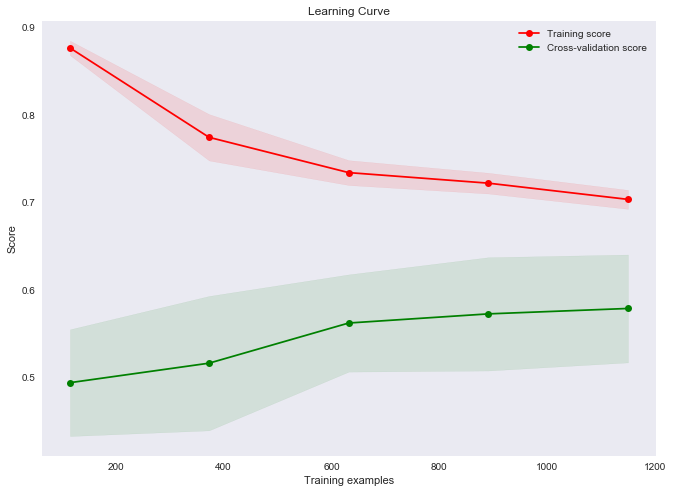

In [604]:
plot_learning_curve(clf, 'Learning Curve', X_train, y_train, cv=5, n_jobs=1)

In [605]:
new_data = pd.read_csv('new_opps_formatted.csv', index_col=0)
act_margin = new_data['Final Margin']

In [606]:
pred_margin = {}
for index, row in new_data.iterrows():
    inputs = [row['Annual Consumption'],
              row['Consulting'],
              row['Sale Type'],
              row['Channel'],
              row['Seasonality'],
              row['Contract Product']]
    pred_margin[index] = get_margin(inputs)

In [607]:
pred_margin = pd.Series(pred_margin)
margin_comp = pd.concat([pred_margin, act_margin], axis=1)
margin_comp.columns = ['Predicted', 'Actual']
margin_comp['Residuals'] = margin_comp['Predicted'] - margin_comp['Actual']
margin_comp['Absolute Residuals'] = np.abs(margin_comp['Predicted'] - margin_comp['Actual'])
margin_comp['Consumption'] = new_data['Annual Consumption']

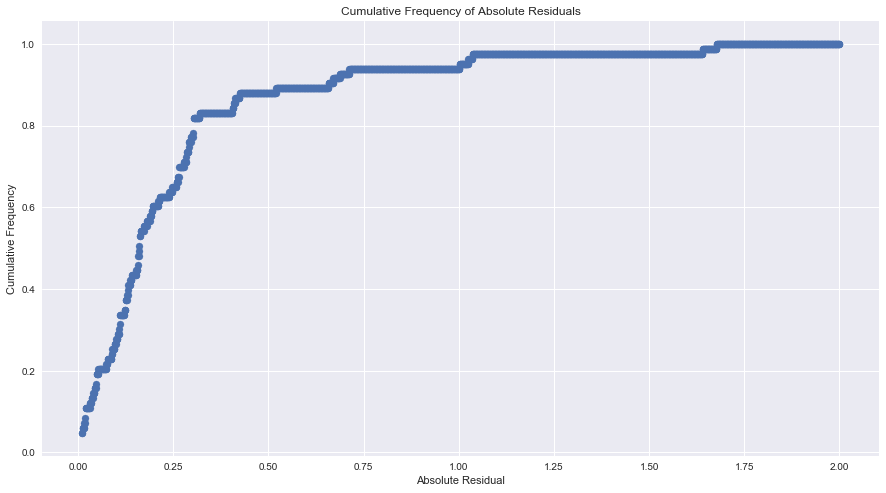

0.8313253012048193


In [608]:
plot_cumres(margin_comp)

C:\Users\GAS01589\AppData\Local\Continuum\miniconda2\envs\py3k\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


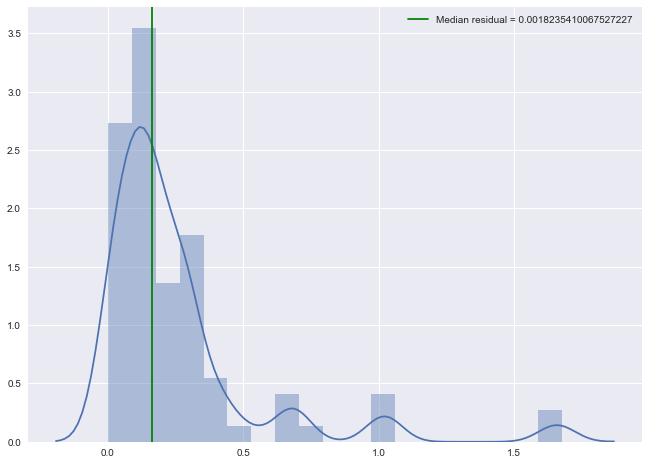

In [609]:
plt.figure(figsize=(11,8))
sns.distplot(list(margin_comp['Absolute Residuals'].values))
median = np.median(margin_comp['Absolute Residuals'])
plt.axvline(median, color='g', label='Median residual = '+str(mean))
plt.legend()
#plt.xlim((-1,.5))